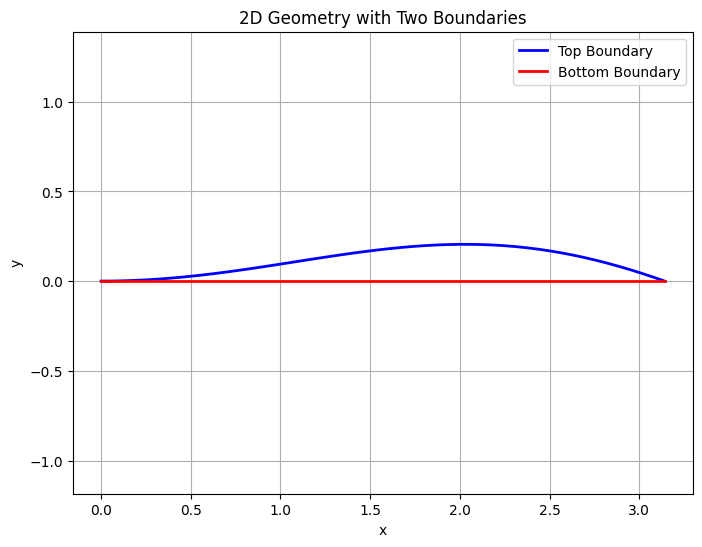

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two functions for the boundaries
def f_top(x):
    return np.sqrt((x**2)*(np.tan(np.pi / 28))**2)*np.sin(x);  # Example top boundary function

def f_bottom(x):
    return 0*x  # Example bottom boundary function

# Discretize the functions into points
x_vals = np.linspace(0, np.pi, 100)  # Range and number of points
y_vals_top = f_top(x_vals)
y_vals_bottom = f_bottom(x_vals)

# Plot the boundaries
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals_top, label="Top Boundary", color="b", linewidth=2)
plt.plot(x_vals, y_vals_bottom, label="Bottom Boundary", color="r", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Geometry with Two Boundaries")
plt.legend()
plt.grid(True)
plt.axis("equal")  # Keep aspect ratio equal to see the shape properly
plt.show()

# Write to .geo file for Gmsh
with open("geometry.geo", "w") as file:
    # Write points for top boundary
    for i, (x, y) in enumerate(zip(x_vals, y_vals_top)):
        file.write(f"Point({i + 1}) = {{{x}, {y}, 0, 1.0}};\n")
    # Write points for bottom boundary
    offset = len(x_vals)
    for i, (x, y) in enumerate(zip(x_vals, y_vals_bottom)):
        file.write(f"Point({i + 1 + offset}) = {{{x}, {y}, 0, 1.0}};\n")
    # Write lines connecting points
    for i in range(len(x_vals) - 1):
        file.write(f"Line({i + 1}) = {{{i + 1}, {i + 2}}};\n")
    for i in range(len(x_vals) - 1):
        file.write(f"Line({i + 1 + offset}) = {{{i + 1 + offset}, {i + 2 + offset}}};\n")
    # Close the shape by connecting last point of top boundary to last point of bottom boundary
    file.write(f"Line({2 * len(x_vals) - 1}) = {{{len(x_vals)}, {2 * len(x_vals)}}};\n")
    file.write(f"Line({2 * len(x_vals)}) = {{{2 * len(x_vals)}, 1}};\n")
    # Define a line loop and plane surface
    file.write(f"Line Loop(1) = {{{', '.join(str(i + 1) for i in range(2 * len(x_vals)))}}};\n")
    file.write("Plane Surface(1) = {1};\n")
from google.colab import files
files.download("geometry.geo")